In [3]:
from arcgis.gis import GIS
from arcgis.features.analyze_patterns import find_hot_spots

In [17]:
#Cuenta de ArcGIS Enterprise con creditos:
#gis = GIS("https://www.arcgis.com", "renemorenow")
gis = GIS("https://www.arcgis.com", "wmoreno_project_esri_co")

#### Use the map widget

In [20]:
from arcgis.widgets import MapView
MapView.set_js_cdn("https://js.arcgis.com/4.19/")

In [11]:
map1 = gis.map("Seattle, WA")
map1.basemap = "streets"
map1

MapView(layout=Layout(height='400px', width='100%'))

In [7]:
search_results = gis.content.search("title:Puget Sound Traffic Incidents", item_type="Feature Service", outside_org=True)

<Item title:"Puget Sound Traffic Incidents" type:Feature Layer Collection owner:EsriTrainingSvc>
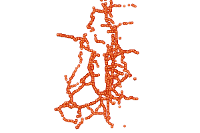

In [8]:
incidents_feature_layer_collection = search_results[0]
incidents_feature_layer_collection

In [9]:
incidents_feature_layer = incidents_feature_layer_collection.layers[0]
incidents_feature_layer

<FeatureLayer url:"https://services.arcgis.com/ue9rwulIoeLEI9bj/arcgis/rest/services/Puget_Sound_Traffic_Incidents/FeatureServer/0">

In [12]:
map1.add_layer(incidents_feature_layer)

In [32]:
find_hot_spots(incidents_feature_layer, output_name='Puget Sound Traffic Stops WR 2', gis=gis)

RecursionError: maximum recursion depth exceeded

In [18]:
hotspot_results = gis.content.search("title:Puget Sound Traffic Stops WR", item_type="Feature Service")
hotspot_results

[<Item title:"Puget_Sound_Traffic_Stops_WR" type:Feature Layer Collection owner:wmoreno_project_esri_co>]

In [19]:
hotspot_feature_layer_collection = hotspot_results[0]

In [21]:
hotspot_feature_layer = hotspot_feature_layer_collection.layers[0]

In [ ]:
map1.remove_layers([incidents_feature_layer])

In [ ]:
map1.add_layer(hotspot_feature_layer)

In [ ]:
map1

In [20]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [25]:
sdf = pd.DataFrame.spatial.from_layer(hotspot_feature_layer)
sdf

,OBJECTID,SOURCE_ID,JOIN_COUNT,GiPValue,GiZScore,Gi_Bin,Gi_Text,NNeighbors,SHAPE
0,1,1,2,0.24934,-1.151955,0,Not Significant,10,"{""rings"": [[[-13666394.1345, 6275287.9758], [-..."
1,2,2,9,0.228744,-1.2036,0,Not Significant,11,"{""rings"": [[[-13663325.1345, 6275287.9758], [-..."
2,3,3,1,0.038762,-2.066706,-1,Cold Spot with 90% Confidence,26,"{""rings"": [[[-13635704.1346, 6275287.9758], [-..."
3,4,4,3,0.016672,-2.393872,-1,Cold Spot with 90% Confidence,27,"{""rings"": [[[-13611152.1345, 6275287.9758], [-..."
4,5,5,7,0.215654,-1.238168,0,Not Significant,12,"{""rings"": [[[-13663325.1345, 6272210.0709], [-..."
...,...,...,...,...,...,...,...,...,...
914,915,915,6,0.369072,-0.898213,0,Not Significant,19,"{""rings"": [[[-13687877.1345, 5902813.5643], [-..."
915,916,916,1,0.628664,-0.483609,0,Not Significant,1,"{""rings"": [[[-13574324.1345, 5902813.5643], [-..."
916,917,917,141,0.370806,-0.894965,0,Not Significant,16,"{""rings"": [[[-13690946.1345, 5899734.8536], [-..."
917,918,918,5,0.419679,-0.806978,0,Not Significant,15,"{""rings"": [[[-13687877.1345, 5899734.8536], [-..."


In [50]:
for i in range(100):
    if sdf.iloc[i].SHAPE.part_count > 1:
        print(sdf.iloc[10].SHAPE)
        print(sdf.iloc[i].SHAPE.part_count)

In [61]:
for f in sdf.SHAPE:
    if f.part_count>1:
        print(f.part_count)

In [23]:
dict(sdf.spatial.iloc[1].SHAPE)

AttributeError: 'GeoAccessor' object has no attribute 'iloc'

In [24]:
sdf.spatial.head()

AttributeError: 'GeoAccessor' object has no attribute 'head'

In [ ]:
sdf['Pct Diff'] = 0
sdf.spatial.to_featureclass(location=r"C:\EsriTraining\hotspot.shp")